In [43]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
game_df = pd.read_csv("../Resources/game_clean_df.csv")
game_df.head()

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Developer,Rating
0,42,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,12610000,97,Rockstar North,M
1,77,FIFA 16,PS4,2015,Sports,Electronic Arts,8570000,82,EA Sports,E
2,92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,7660000,83,Sledgehammer Games,M
3,94,FIFA 17,PS4,2016,Sports,Electronic Arts,7590000,85,"EA Sports, EA Vancouver",E
4,105,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,7160000,87,Bethesda Game Studios,M


In [44]:
# Drop the non-beneficial ID columns, 'Unnamed: 0'.
game_df.drop(columns=["Unnamed: 0"], inplace=True)
game_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Developer,Rating
0,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,12610000,97,Rockstar North,M
1,FIFA 16,PS4,2015,Sports,Electronic Arts,8570000,82,EA Sports,E
2,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,7660000,83,Sledgehammer Games,M
3,FIFA 17,PS4,2016,Sports,Electronic Arts,7590000,85,"EA Sports, EA Vancouver",E
4,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,7160000,87,Bethesda Game Studios,M


In [45]:
# Determine the number of unique values in each column.
game_cat = game_df.columns.tolist()

game_df[game_cat].nunique()

Name               496
Platform             5
Year_of_Release      5
Genre               12
Publisher           79
Global_Sales       214
Critic_Score        69
Developer          294
Rating               4
dtype: int64

In [46]:
# Look at Critic_Score value counts for binning
Critic_Score = game_df["Critic_Score"].value_counts()
Critic_Score

80    36
76    32
81    32
73    32
78    31
      ..
31     1
46     1
94     1
95     1
40     1
Name: Critic_Score, Length: 69, dtype: int64

<AxesSubplot:ylabel='Density'>

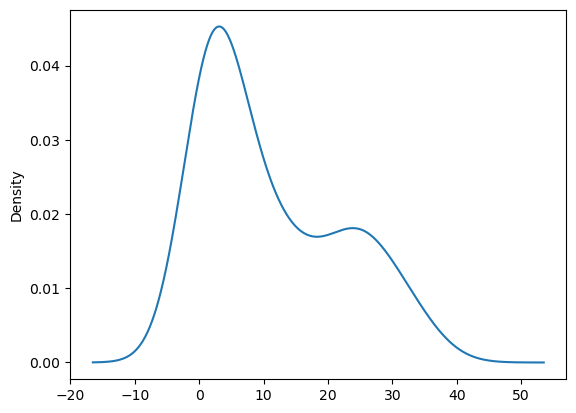

In [47]:
# Visualize the value counts of APPLICATION_TYPE
Critic_Score.plot.density()

In [48]:
# Determine which values to replace if counts are less than ...?
replace_application = list(Critic_Score[Critic_Score < 500].index)

# Replace in dataframe
for app in replace_application:
    game_df.Critic_Score = game_df.Critic_Score.replace(app,"Other")
    
# Check to make sure binning was successful
game_df.Critic_Score.value_counts()

Other    767
Name: Critic_Score, dtype: int64

In [49]:
# Look at Year_of_Release value counts for binning
Year_of_Release_counts = game_df["Year_of_Release"].value_counts()
Year_of_Release_counts

2016    202
2015    191
2014    174
2013    109
2012     91
Name: Year_of_Release, dtype: int64

<AxesSubplot:ylabel='Density'>

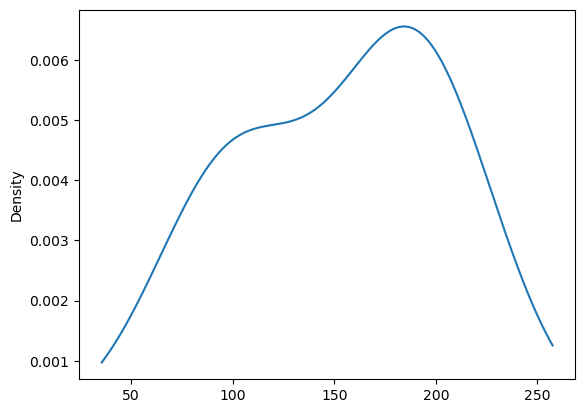

In [50]:
# Visualize the value counts of CLASSIFICATION
Year_of_Release_counts.plot.density()

In [51]:
# Determine which values to replace if counts are less than ..?
replace_class = list(Year_of_Release_counts[Year_of_Release_counts < 1500].index)

# Replace in dataframe
for cls in replace_class:
    game_df.Year_of_Release = game_df.Year_of_Release.replace(cls,"Other")
    
# Check to make sure binning was successful
game_df.Year_of_Release.value_counts()

Other    767
Name: Year_of_Release, dtype: int64

In [52]:
# Generate our categorical variable lists
video_game_cat = game_df.dtypes[game_df.dtypes == "object"].index.tolist()

game_df[video_game_cat].nunique()

Name               496
Platform             5
Year_of_Release      1
Genre               12
Publisher           79
Critic_Score         1
Developer          294
Rating               4
dtype: int64

In [53]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(game_df[video_game_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(video_game_cat)
encode_df.head()

c:\Users\altra\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Name_7 Days to Die,Name_Aegis of Earth: Protonovus Assault,Name_Agatha Christie's The ABC Murders,Name_Alan Wake,Name_Alien: Isolation,Name_Aliens: Colonial Marines,Name_Angry Birds Star Wars,Name_Anima - Gate of Memories,Name_Animal Crossing: Amiibo Festival,Name_Anno 2205,...,Developer_Yuke's,Developer_ZeniMax Media,Developer_Zerodiv,Developer_Zipper Interactive,Developer_Zoe Mode,Developer_id Software,Rating_E,Rating_E10+,Rating_M,Rating_T
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
# Merge one-hot encoded features and drop the originals
game_df = game_df.merge(encode_df,left_index=True, right_index=True)
game_df = game_df.drop(game_df, 1)
game_df.head()

c:\Users\altra\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


""
0
1
2
3
4


In [55]:
# Split our preprocessed data into our features and target arrays
y = game_df["Name"].values
X = game_df.drop(["Name"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

KeyError: 'Name'

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint


# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch', 
    period=5)

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 993us/step - loss: 0.5717 - accuracy: 0.7235
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5558 - accuracy: 0.7275
Epoch 3/100
804/804 [==============================] - 1s 935us/step - loss: 0.5531 - accuracy: 0.7299
Epoch 4/100
804/804 [==============================] - 1s 891us/step - loss: 0.5515 - accuracy: 0.7317
Epoch 5/100
800/804 [============================>.] - ETA: 0s - loss: 0.5502 - accuracy: 0.7325
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5505 - accuracy: 0.7324
Epoch 6/100
804/804 [==============================] - 1s 994us/step - loss: 0.5486 - accuracy: 0.7332
Epoch 7/100
804/804 [==============================] - 1s 894us/step - loss: 0.5475 - accuracy: 0.7326
Epoch 8/100
804/804 [==============================] - 1s 969us/step - loss: 0.5479 - accuracy: 0.7338
Epoch 9/100
804/804 [=====================

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5551 - accuracy: 0.7261 - 618ms/epoch - 2ms/step
Loss: 0.5550989508628845, Accuracy: 0.726064145565033


In [ ]:
nn.save("AlphabetSoupCharity.h5")